In [385]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Sep 24 21:52:30 2018

@author: whitneyreiner
"""
#Import packages
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2
import numpy as np
import pandas as pd, matplotlib.pyplot as plt, time
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
from datetime import datetime as dt
import seaborn as sns
import hdbscan
from numpy import arccos, arcsin, around, cos, pi, radians, sin
%matplotlib inline

#2018
df= pd.read_csv('tickets_table.csv', low_memory = False)


In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266852 entries, 0 to 1266851
Data columns (total 22 columns):
ticketnumber            1266852 non-null object
meterid                 323816 non-null object
markedtime              43132 non-null float64
make                    1266158 non-null object
bodystyle               1266229 non-null object
color                   1266620 non-null object
location                1266852 non-null object
route                   1261227 non-null object
agency                  1266849 non-null float64
violationcode           1266852 non-null object
violationdescription    1266852 non-null object
fineamount              1266852 non-null float64
latitude                1266850 non-null float64
longitude               1266850 non-null float64
issuetime               1266852 non-null object
dt_issuednew            1266852 non-null object
issuedatenew            1266852 non-null object
issueyear               1266852 non-null int64
weekday               

In [362]:
df = df[~df['violationdescription'].isnull()] 
df['latitude'] = pd.to_numeric(df['latitude'])
df['longitude'] = pd.to_numeric(df['longitude'])
df['dt_issuednew'] = pd.to_datetime(df['dt_issuednew'])
df = df[~df['latitude'].isnull()] 
df[['latitude','longitude']].isnull().sum()


latitude     0
longitude    0
dtype: int64

In [363]:
exp = df
tmp = exp['violationdescription'].value_counts()
var_list = [tmp.index[i] for i in range(0, len(tmp)) if tmp[i] <200]
var_list
df2 = df[~df['violationdescription'].isin(var_list)]

In [364]:
df3=df2.sample(100000)

In [365]:
dftest=df2.sample(100)

In [367]:
#training sample
#sample1= sampled 100000 records in sql db from 2018
sample1= df3
#df.iloc[:10000,:]
sample1Coords = sample1[['newLat', 'newLong']].values


In [371]:
sample1Coords=np.radians(sample1Coords)
#ticketingfeature= sample1['violationdescription'].values
#dayfeature=sample1['weekday'].values
#hourfeature=sample1['issuetime'].values


In [381]:
sample1Coords
#pd.options.display.float_format = '{:.5f}'.format


array([[ 0.59420146, -2.06762301],
       [ 0.58984836, -2.06372926],
       [ 0.59469175, -2.06614944],
       ...,
       [ 0.59511845, -2.06345911],
       [ 0.59419731, -2.06385564],
       [ 0.59465329, -2.06513506]])

In [368]:
datacoords = sample1[['newLat', 'newLong']].values


ImportError: [joblib] Attempting to do parallel computing without protecting your import on a system that does not support forking. To use parallel-computing in a script, you must protect your main loop using "if __name__ == '__main__'". Please see the joblib documentation on Parallel for more information

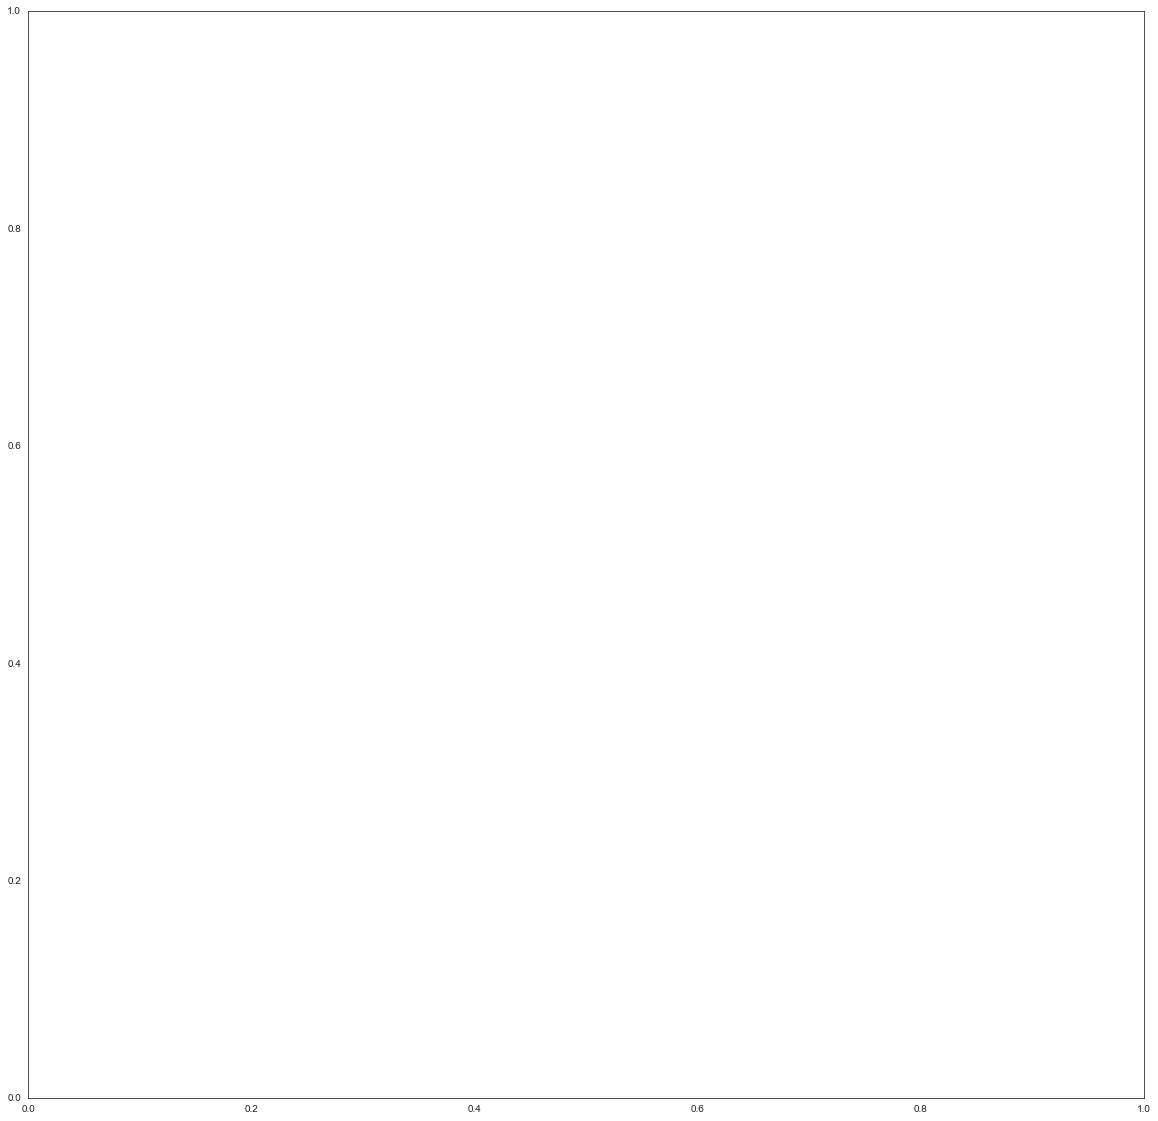

In [373]:
fig, ax = plt.subplots(figsize=[20, 20])
clusterer = hdbscan.HDBSCAN(metric='haversine', min_cluster_size=25)
clusterer.fit(sample1Coords)
clusterer.labels_



In [ ]:
clusterer.exemplars_

In [ ]:
color_palette = sns.color_palette('deep', 100000)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]

plt.scatter(*datacoords.T, s=10, linewidth=0, c=cluster_member_colors, alpha=0.75)


In [341]:
clusterer.labels_.max()

50

In [342]:
clusterer_labels = pd.DataFrame({'Cluster_no':clusterer.labels_})

In [343]:
clusterer_labels.head()

,Cluster_no
0,-1
1,-1
2,49
3,31
4,33


In [344]:
#clusterer_labels = pd.DataFrame({'Cluster_no':clusterer.labels_})
clusterer_labels['Cluster_no'].value_counts()[:1000]

-1     4552
 49     817
 36     328
 11     300
 31     226
 45     222
 48     191
 21     168
 33     159
 35     156
 2      136
 47     131
 50     130
 44     125
 18     123
 16     109
 3      108
 39     106
 1      105
 23     101
 20      98
 46      89
 10      89
 24      80
 22      76
 12      73
 9       72
 29      70
 0       65
 26      64
 27      61
 19      55
 14      54
 7       53
 6       53
 28      53
 25      51
 41      50
 13      44
 42      42
 5       41
 40      41
 34      41
 37      39
 17      36
 8       36
 15      35
 43      31
 38      30
 30      30
 32      28
 4       27
Name: Cluster_no, dtype: int64

In [345]:
clusterer_probabilities = clusterer.probabilities_
clusterer_probabilities

clusterer_probabilities = pd.DataFrame({'Cluster_p':clusterer_probabilities})

In [346]:
clusterer_probabilities['Cluster_p'].value_counts()

0.00000    4552
1.00000    2284
0.47884      19
0.88493      19
0.78337      15
0.97269      14
0.35323      13
0.28825      12
0.84661      11
0.28946      10
0.92253      10
0.81930       9
0.20282       9
0.75898       8
0.70231       8
0.84471       8
0.60506       8
0.86436       7
0.36707       7
0.94498       7
0.97832       7
0.29497       7
0.63333       7
0.86937       7
0.97241       6
0.84668       6
0.74514       6
0.36100       6
0.94960       6
0.32521       6
           ... 
0.57270       1
0.33129       1
0.79564       1
0.24554       1
0.94241       1
0.72330       1
0.80029       1
0.81673       1
0.97731       1
0.91842       1
0.92415       1
0.87921       1
0.84812       1
0.84706       1
0.95096       1
0.52762       1
0.76430       1
0.92646       1
0.96137       1
0.87531       1
0.98808       1
0.45310       1
0.30054       1
0.14144       1
0.23112       1
0.91148       1
0.50284       1
0.42203       1
0.84679       1
0.20544       1
Name: Cluster_p, Length:

In [347]:

#clusterer_probabilities = pd.DataFrame({'Cluster_p':clusterer.probabilities_})
dfclust = pd.concat([df2, clusterer_labels, clusterer_probabilities], axis=1)
dfclust.head(100)
# save to csv
dfclust.to_csv('train_dfclust_Ticketingfeature_cityblock.csv', index=False, encoding='utf-8')

In [186]:
#HDBSCAN
#data = sample1Coords[['latitude', 'longitude']].values

#data = np.radians(datacoor)
#16 newlat
#17 newlong
#19 cluster_no
#20 cluster_p


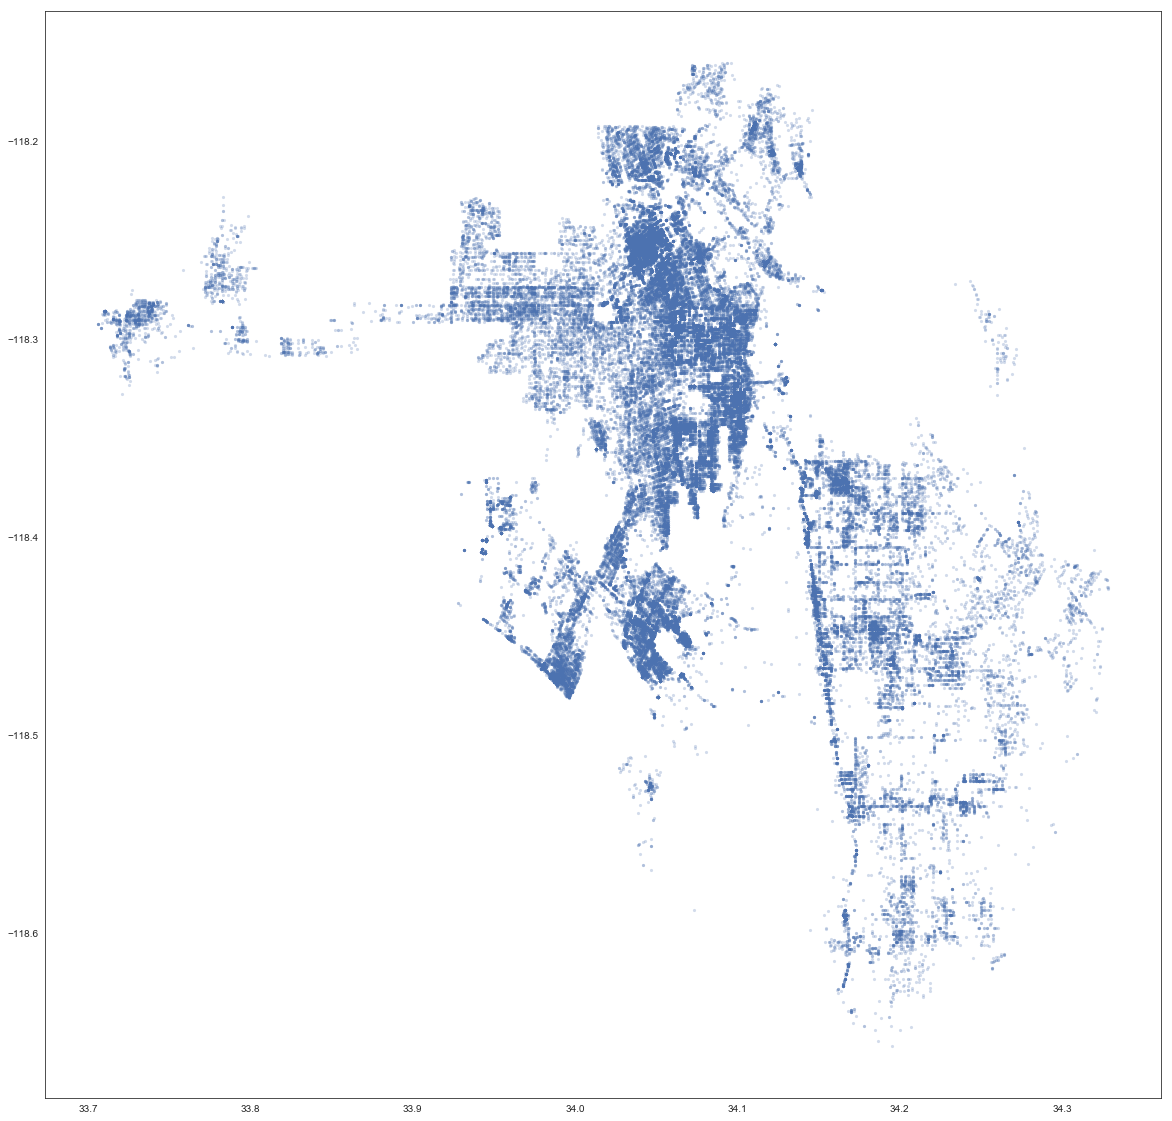

In [376]:
fig, ax = plt.subplots(figsize=[20, 20])
plt.scatter(*datacoords.T, s=10, linewidth=0, c='b', alpha=0.25)

In [384]:
algorithm = hdbscan.HDBSCAN
algorithm_kwargs = dict(metric='haversine',min_cluster_size=25)
clusterer = hdbscan.HDBSCAN(algorithm_kwargs)
clusterer.fit(sample1Coords)

color_palette = sns.color_palette('deep', 100000)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]

plt.scatter(*datacoords.T, s=10, linewidth=0, c=cluster_member_colors, alpha=0.75)





ValueError: Min samples and min cluster size must be integers!

In [119]:
#extract the clusters
#sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 25, 'linewidths':0}

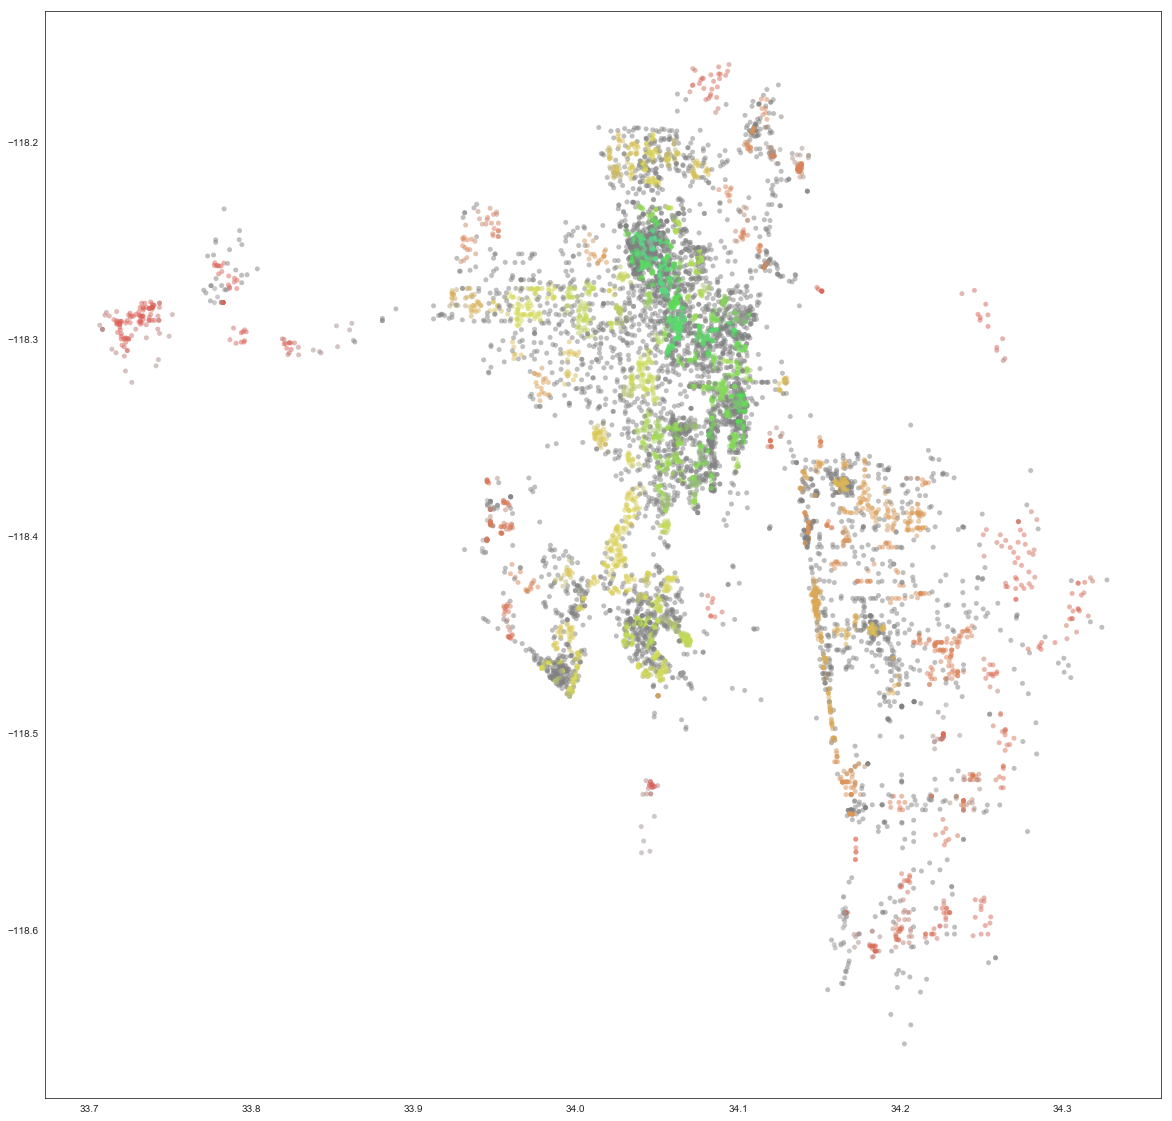

In [348]:
clusterer = hdbscan.HDBSCAN(metric='cityblock', min_cluster_size=5, min_samples=6)
clusterer.fit(sample1Coords, ticketingfeature)

palette = sns.color_palette("hls", 1000)
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]
fig, ax = plt.subplots(figsize=[20, 20])
plt.scatter(datacoords.T[0], datacoords.T[1], c=cluster_colors, **plot_kwds)


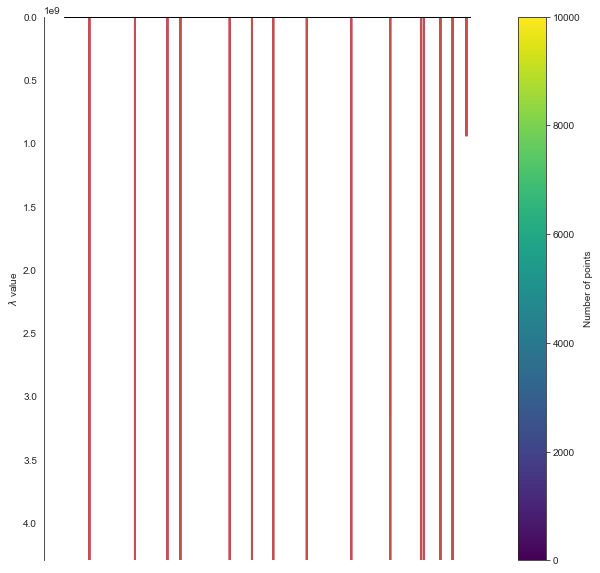

In [350]:
fig, ax = plt.subplots(figsize=[10, 10])
clusterer.condensed_tree_.plot(select_clusters=False, selection_palette=sns.color_palette())

In [ ]:

#Predicting new data

In [ ]:
#Use a test set- 35 from 2018

In [73]:


# Define a database name
# Set your postgres username
dbname = 'postgres'
username = 'whitneyreiner' # change this to your username


## 'engine' is a connection to a database
## Here, we're using postgres, but sqlalchemy can connect to other things too.
engine = create_engine('postgres://%s@localhost/%s'%(username,dbname))
print(engine.url)


# Connect to make queries using psycopg2
con = None
con = psycopg2.connect(database = dbname, user = username)

# query:
sql_query = """
SELECT *
FROM import.dfclean
WHERE issueyear='2018' AND NOT latitude='99999.0'
OFFSET 100000 ROWS
FETCH NEXT 100 ROWS ONLY
;

"""

testset_table_from_sql = pd.read_sql_query(sql_query,con)
testset_table_from_sql.head()


postgres://whitneyreiner@localhost/postgres


,_col8081,ticket_number,meter_id,marked_time,make,body_style,color,location,route,agency,...,violation_description,fine_amount,latitude,longitude,issuetime,dt_issuednew,issuedatenew,issueyear,weekday,month
0,6878230,4324265750,,,TOYT,PA,GY,844 LAS PALMAS AVE N,00481,54.0,...,PARKED ON SIDEWALK,68.0,6459851.884857,1853884.997148,13:39:00,2018-02-06 13:39:00,2018-02-06 00:00:00,2018,1,2
1,6878231,4324265761,LM115,,HOND,PA,GY,6721 MELROSE AV,00481,54.0,...,METER EXP.,63.0,6458758.827494999,1852925.642032,13:45:00,2018-02-06 13:45:00,2018-02-06 00:00:00,2018,1,2
2,6878232,4324265772,LM104,,TSMR,PA,BK,706 CITRUS AV N,00481,54.0,...,METER EXP.,63.0,6458818.1533697,1852966.33415351,13:50:00,2018-02-06 13:50:00,2018-02-06 00:00:00,2018,1,2
3,6878233,4324265783,SH211,,TSMR,PA,WT,1045 MANSFIELD AV N,00481,54.0,...,METER EXP.,63.0,6458591.304574,1855204.636553,15:49:00,2018-02-06 15:49:00,2018-02-06 00:00:00,2018,1,2
4,6878234,4324265794,,,BMW,PA,BK,969 LA BREA AVE N,00481,54.0,...,NO STOPPING/ANTI-GRIDLOCK ZONE,163.0,6457492.539983001,1854707.9192830003,16:06:00,2018-02-06 16:06:00,2018-02-06 00:00:00,2018,1,2


In [110]:
testset_table_from_sql.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 21 columns):
_col8081                 100 non-null object
ticket_number            100 non-null object
meter_id                 100 non-null object
marked_time              100 non-null object
make                     100 non-null object
body_style               100 non-null object
color                    100 non-null object
location                 100 non-null object
route                    100 non-null object
agency                   100 non-null object
violation_code           100 non-null object
violation_description    100 non-null object
fine_amount              100 non-null object
latitude                 100 non-null float64
longitude                100 non-null float64
issuetime                100 non-null object
dt_issuednew             100 non-null datetime64[ns]
issuedatenew             100 non-null object
issueyear                100 non-null object
weekday                  100 no

In [49]:
#double check to make sure you queried correctly by looking for one of the ticket 
#numbers in this table in the training data table:
'4328155075' in tickets_table_from_sql.ticketnumber.values

False

In [80]:
testset_table_from_sql['latitude'] = pd.to_numeric(testset_table_from_sql['latitude'])
testset_table_from_sql['longitude'] = pd.to_numeric(testset_table_from_sql['longitude'])
testset_table_from_sql['dt_issuednew'] = pd.to_datetime(testset_table_from_sql['dt_issuednew'])
testset_table_from_sql = testset_table_from_sql[~testset_table_from_sql['latitude'].isnull()] 
testset_table_from_sql[['latitude','longitude']].isnull().sum()

latitude     0
longitude    0
dtype: int64

In [354]:
#test sample
#testsample=  35 records in sql db from 2018 STARTING AFTER record 100000 
testsample=dftest
testsampleCoords = dftest[['latitude', 'longitude']].values
testtickfeats=dftest['violationdescription'].values

In [263]:
#training data = datacoords

In [356]:
testsampleCoords = dftest[['latitude', 'longitude']].values
testtickfeats=dftest['violationdescription'].values
test_points_coords = dftest[['newLat', 'newLong']].values

In [357]:
#check the size 
test_points_coords.shape

(100, 2)

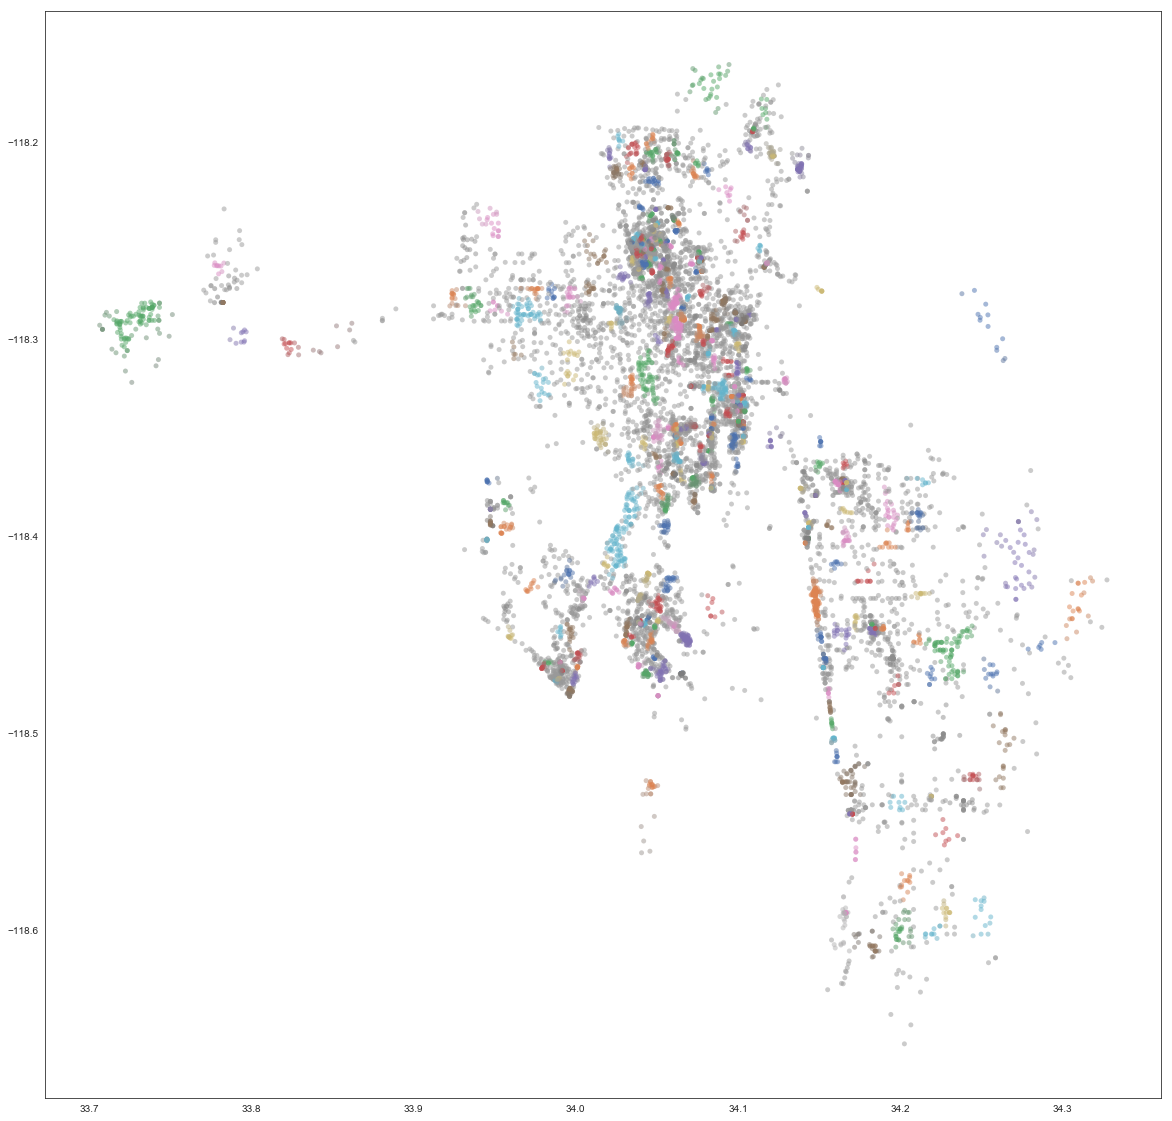

In [351]:
#set it up so it knows it is prediciton data
clusterer = hdbscan.HDBSCAN(metric='cityblock', min_cluster_size=6, min_samples=6,prediction_data=True)
clusterer.fit(sample1Coords,ticketingfeature)
pal = sns.color_palette('deep', 10000)
colors = [sns.desaturate(pal[col], sat) for col, sat in zip(clusterer.labels_, clusterer.probabilities_)]
fig, ax = plt.subplots(figsize=[20, 20])
plt.scatter(datacoords.T[0], datacoords.T[1], c=colors, **plot_kwds);

array([34.12045911, 34.12045911, 34.12045911, ..., 33.85355322,
       33.73330232, 34.02491849])

In [ ]:
testsampleCoords = dftest[['latitude', 'longitude']].values
testtickfeats=dftest['violationdescription'].values
test_points_coords = dftest[['newLat', 'newLong']].values

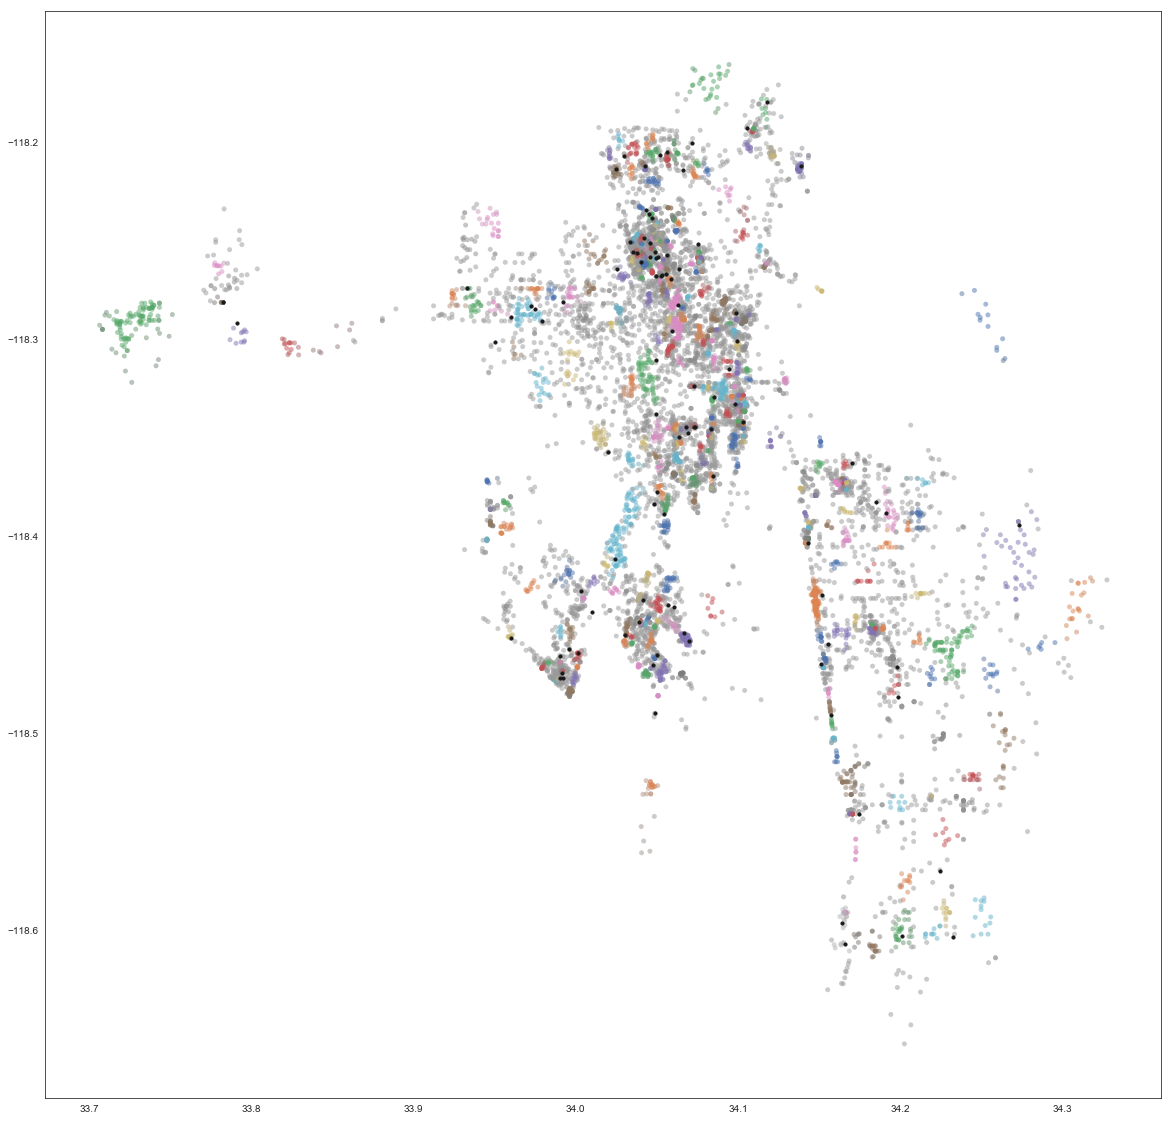

In [359]:
# MAKE SURE YOU ARE PLOTTING BOTH AS RADS OR BOTH AS COORDINATES!!!! OR IT WILL FUCK UP

fig, ax = plt.subplots(figsize=[20, 20])
colors = [sns.desaturate(pal[col], sat) for col, sat in zip(clusterer.labels_, clusterer.probabilities_)]
#plt.ylim(-2.072, -2.060)                                                           
#plt.xlim(0.586, 0.601)
plt.scatter(datacoords.T[0], datacoords.T[1], c=colors, **plot_kwds);
plt.scatter(*test_points_coords.T, c='k', s=10)

In [127]:
test_labels, strengths = hdbscan.approximate_predict(clusterer, test_points)
test_labels

array([261,  -1,  -1, 347,  -1,  -1,  -1, 312, 312, 312,  -1,  -1,  -1,
       312, 312,  -1,  -1,  -1,  -1,  -1,  -1, 214, 214,  -1,  -1,  -1,
        -1,  -1, 316, 370,  -1,  -1,  -1,  -1, 276, 276, 276,  -1,  77,
        77,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1, 504,
       314,  -1, 500, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249,
       249, 249, 249, 249, 249, 249, 249, 249, 249])

In [163]:
test_labelsdf = pd.DataFrame({'test_clust_no': test_labels})
test_labelsdf.head()

,test_clust_no
0,261
1,-1
2,-1
3,347
4,-1


In [164]:
testSet_dfclust = pd.concat([testsample, test_labelsdf], axis=1)
testSet_dfclust.describe()
testSet_dfclust.head()
#save as csv

,_col8081,ticket_number,meter_id,marked_time,make,body_style,color,location,route,agency,...,fine_amount,latitude,longitude,issuetime,dt_issuednew,issuedatenew,issueyear,weekday,month,test_clust_no
0,6878230,4324265750,,,TOYT,PA,GY,844 LAS PALMAS AVE N,00481,54.0,...,68.0,6459851.88486,1853884.99715,13:39:00,2018-02-06 13:39:00,2018-02-06 00:00:00,2018,1,2,261
1,6878231,4324265761,LM115,,HOND,PA,GY,6721 MELROSE AV,00481,54.0,...,63.0,6458758.82749,1852925.64203,13:45:00,2018-02-06 13:45:00,2018-02-06 00:00:00,2018,1,2,-1
2,6878232,4324265772,LM104,,TSMR,PA,BK,706 CITRUS AV N,00481,54.0,...,63.0,6458818.15337,1852966.33415,13:50:00,2018-02-06 13:50:00,2018-02-06 00:00:00,2018,1,2,-1
3,6878233,4324265783,SH211,,TSMR,PA,WT,1045 MANSFIELD AV N,00481,54.0,...,63.0,6458591.30457,1855204.63655,15:49:00,2018-02-06 15:49:00,2018-02-06 00:00:00,2018,1,2,347
4,6878234,4324265794,,,BMW,PA,BK,969 LA BREA AVE N,00481,54.0,...,163.0,6457492.53998,1854707.91928,16:06:00,2018-02-06 16:06:00,2018-02-06 00:00:00,2018,1,2,-1


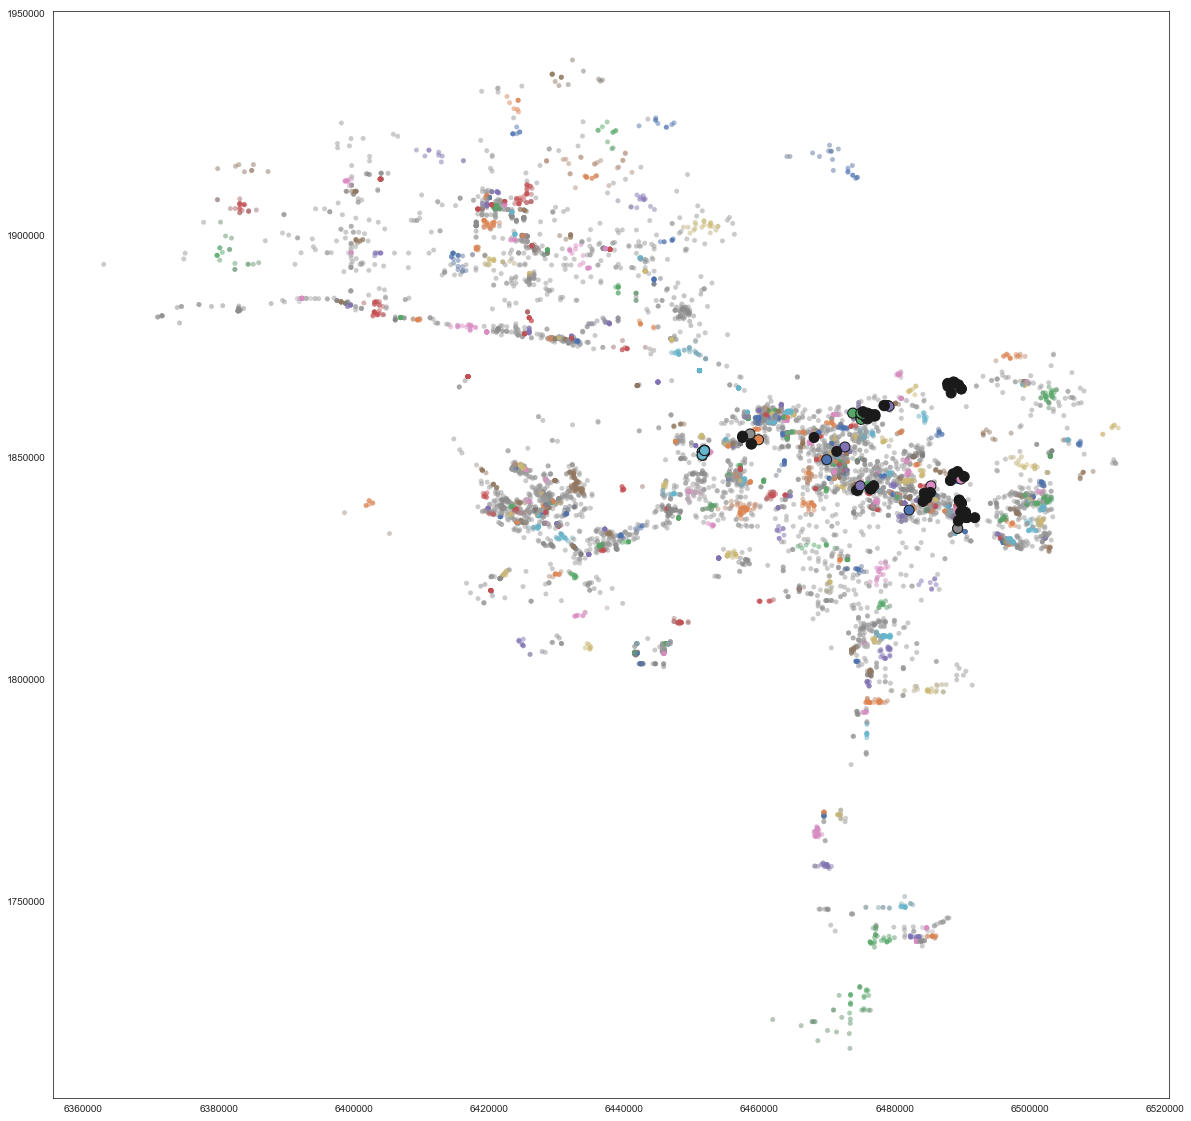

In [165]:
# MAKE SURE YOU ARE PLOTTING BOTH AS RADS OR BOTH AS COORDINATES!!!! OR IT WILL FUCK UP
fig, ax = plt.subplots(figsize=[20, 20])

colors = [sns.desaturate(pal[col], sat) for col, sat in zip(clusterer.labels_, clusterer.probabilities_)]
test_colors = [pal[col] if col >= 0 else (0.1, 0.1, 0.1) for col in test_labels]
plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds);
plt.scatter(*test_points_coords.T, c=test_colors, s=100, linewidths=1, edgecolors='k')


In [63]:
#save training lat and long coordinates
np.save('train_datacoor',datacoor)
#save training data radians
np.save('train_dataRadians',data)
#save clusterer_labels
np.save('train_clustLabs',clusterer.labels_)
#save clusterer_probabilities
np.save('train_clustProbs', clusterer.probabilities_)